# LSTM MODELS 1

In this notebook, we are going to fit LSTM models by using the dataset without COVID data.

Long-short-term memory (LSTM) models are a variant of recurrent neural networks (RNNs) that are specially designed for time series analysis. Unlike traditional RNNs, LSTMs can capture and learn from long-term dependencies on sequential data. This makes them especially useful for predicting future values in complex time series, where relationships and patterns can extend over long periods.

The LSTM models use memory units called "LSTM Memory", which can remember and forget relevant information as they process sequential data. These cells allow long-term memory of the dependencies found in the time series to be maintained, giving them a unique ability to capture complex patterns and make accurate predictions.

### 📑 Index
* [1. FIRST LSTM MODEL](#1)
* [2. MODEL WITH BEST PARAMETERS (I)](#2)
* [3. MODEL WITH BEST PARAMETERS (II)](#3)
* [4. MODEL WITH BEST PARAMETERS (III)](#4)

Import the packages.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import random

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

import warnings
warnings.filterwarnings("ignore")

from pylab import rcParams
plt.style.use("fivethirtyeight")
plt.rcParams["lines.linewidth"] = 1.5
dark_style = {
    "figure.facecolor": "#212946",
    "axes.facecolor": "#212946",
    "savefig.facecolor": "#212946",
    "axes.grid": True,
    "axes.grid.which": "both",
    "axes.spines.left": False,
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.spines.bottom": False,
    "grid.color": "#2A3459",
    "grid.linewidth": "1",
    "text.color": "0.6",
    "axes.labelcolor": "0.6",
    "xtick.color": "0.6",
    "ytick.color": "0.6",
    "font.size": 12,
}
plt.rcParams.update(dark_style)
rcParams["figure.figsize"] = (18, 7)

Load the data and consider that our data set goes from 2003 to 2019 (without COVID).

In [2]:
df = pd.read_csv(
    "C:/Users/Juanfran cd/Desktop/MATEMATICAS UA/TFG/air traffic.csv",
    encoding="ISO-8859-1",
)

# Clean and convert 'Pax' to number
df["Pax"] = df["Pax"].str.replace(",", "", regex=True).astype(float)

# Create date column in YYYY-MM format
df["Date"] = pd.to_datetime(
    df["Year"].astype(str) + "-" + df["Month"].astype(str).str.zfill(2), format="%Y-%m"
)

# Filter data between 2003 and 2019 and select relevant columns
df1 = df.loc[df["Year"].between(2003, 2019), ["Date", "Pax"]].copy()

Split the data set into 2: a training set (from 2003 to 2017, that is 180 values) and a test set (from 2018 to 2019, that is 24 values).

In [3]:
train = df1.loc[df1["Date"] <= "2017-12-01"]
test = df1.loc[df1["Date"] >= "2017-01-01"]

In [4]:
len(train), len(test)  

(180, 36)

Plot of Training-Test split

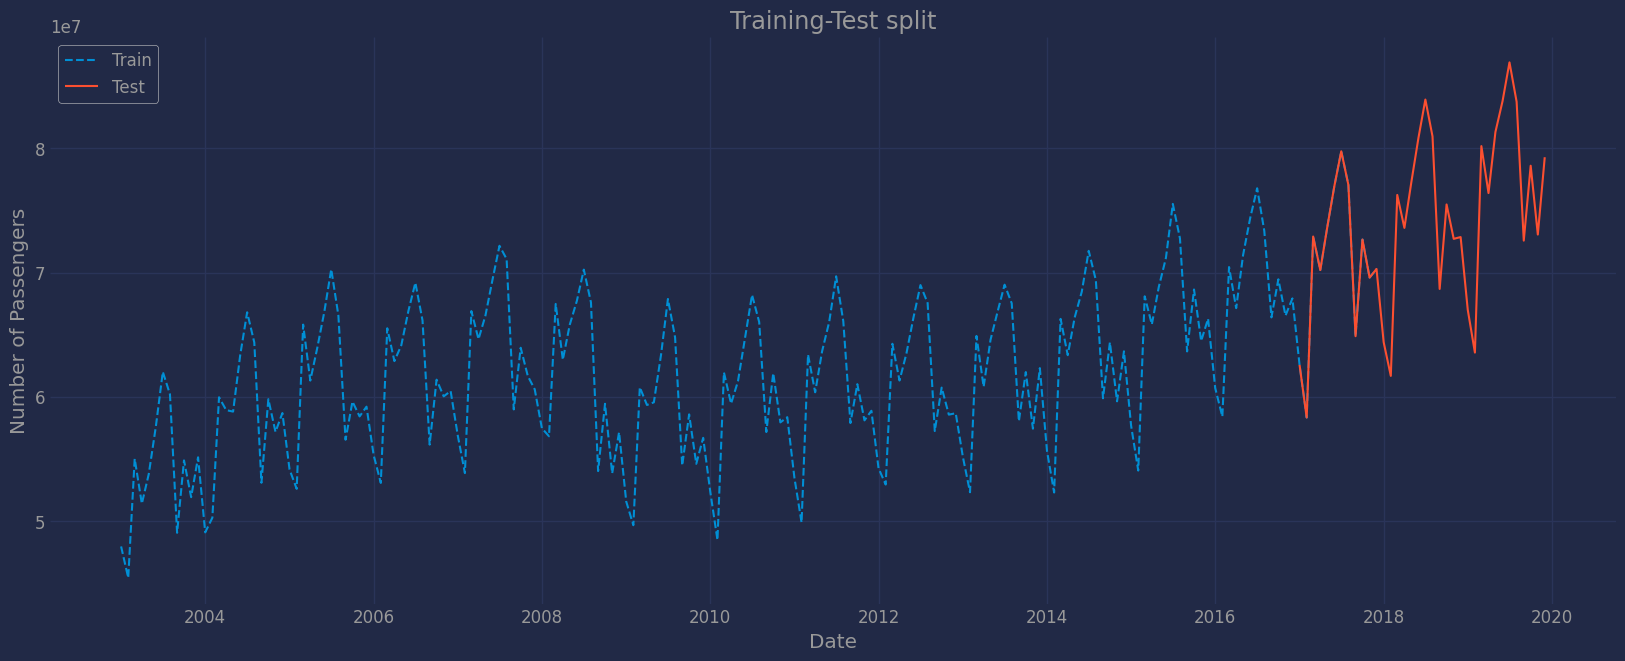

In [5]:
sns.lineplot(data=train, x="Date", y="Pax", label="Train", linestyle="--")
sns.lineplot(data=test, x="Date", y="Pax", label="Test")
plt.title("Training-Test split")
plt.ylabel("Number of Passengers")
plt.show()

Scale the data.

In [6]:
scaler = MinMaxScaler(feature_range=(0, 1))
train["Pax"] = scaler.fit_transform(train[["Pax"]])
test["Pax"] = scaler.transform(test[["Pax"]])
scaled_data = scaler.transform(df1[["Pax"]])

<a id='1'></a>
## 1. FIRST LSTM MODEL

Make a function to create differents data sets by creating differents sets X and y to train the model. It is needed because an LSTM network cannot directly understand a sequence of numbers as such and what this function does is to build input_size sliders so that the network can learn patterns over time.

In [7]:
def create_dataset(data, input_size):
    valores = data.iloc[:, 1].values.astype(np.float32)

    X, y = [], []
    for i in range(len(valores) - input_size - 1):
        a = valores[i:(i + input_size)]
        X.append(a)
        y.append(valores[i + input_size])
        
    return np.array(X, dtype=np.float32), np.array(y, dtype=np.float32)


Construct the pairs (X,y) so that the model learns and change the shape (reshape) of arrays because an LSTM network expects for data in 3 dimensions: (sample number, sequence size, feature number).

In [8]:
input_size = 12  

X_train, y_train = create_dataset(train, input_size)
X_test, y_test = create_dataset(test, input_size)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

Fit the model.

In [9]:
# Fix seed for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1))) 
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))

model.compile(optimizer="adam", loss="mean_squared_error")

Train the model.

In [10]:
model.fit(X_train, y_train, epochs=80, batch_size=32, verbose=1)

Epoch 1/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.2799
Epoch 2/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0782
Epoch 3/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0419
Epoch 4/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0319
Epoch 5/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0319
Epoch 6/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0306
Epoch 7/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0274
Epoch 8/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0283
Epoch 9/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0271
Epoch 10/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0273
Epoch 11/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0268
Epoch 12/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0268
Epoch 13/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0266
Epoch 14/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0265
Epoch 15/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0263
Epoch 16/80
6/6 ━━━━━━━━━━━━━━━━━━

Forecasting.

In [11]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Invert the scale to get the predictions on the original scale.

In [12]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

Error metrics

In [13]:
print("\n🔹 Training set metrics:")
print(f"MAE: {mean_absolute_error(y_train_inv, train_predict):.2f}")
print(f"MAPE: {mean_absolute_percentage_error(y_train_inv, train_predict) * 100:.2f}%")

print("\n🔹 Test set metrics:")
print(f"MAE: {mean_absolute_error(y_test_inv, test_predict):.2f}")
print(f"MAPE: {mean_absolute_percentage_error(y_test_inv, test_predict) * 100:.2f}%")



🔹 Training set metrics:
MAE: 2648910.50
MAPE: 4.27%

🔹 Test set metrics:
MAE: 3935455.00
MAPE: 5.15%


Prepare data for visualization.

In [14]:
train_plot = np.empty_like(scaled_data)
train_plot[:, :] = np.nan
train_plot[input_size : len(train_predict) + input_size, :] = train_predict

test_plot = np.empty_like(scaled_data)
test_plot[:, :] = np.nan
test_plot[len(train_predict) -12 + (input_size * 2) + 1 : len(df1) - 1, :] = test_predict

Plot of the forecasting.

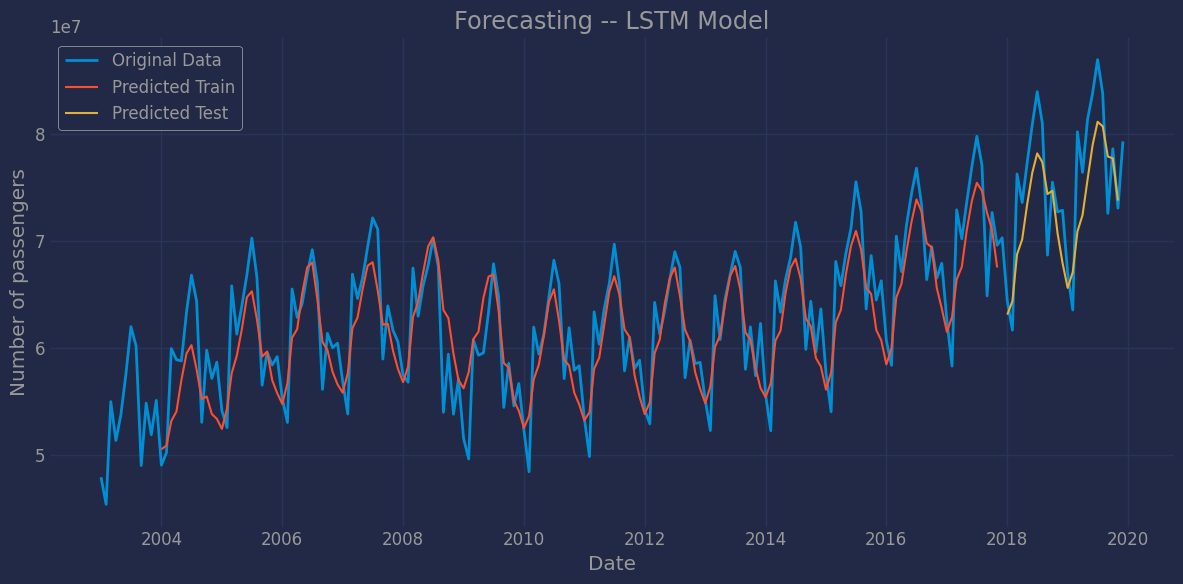

In [15]:
original_pax = df1["Pax"].values.reshape(-1, 1)
plt.figure(figsize=(12, 6))
plt.plot(df1["Date"], original_pax, label="Original Data", linewidth=2)
plt.plot(df1["Date"], train_plot, label="Predicted Train")
plt.plot(df1["Date"], test_plot, label="Predicted Test")
plt.title("Forecasting -- LSTM Model")
plt.xlabel("Date")
plt.ylabel("Number of passengers")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<a id='2'></a>
## 2. MODEL WITH BEST PARAMETERS (I)

Moreover, we can find the best parameters automatically from combinations and by training LSTM models to find the ones that minimize the mean square error (MSE) on the test set.

In [16]:
'''param_grid = {
    "units": [30, 50],
    "optimizer": ["adam", "rmsprop"],
    "epochs": [50, 75,100],
    "batch_size": [16, 32, 64],
    "input_size": [12, 24]
}

best_model = None
best_mse = float("inf")
best_params = None

for units in param_grid["units"]:
    for opt in param_grid["optimizer"]:
        for epochs in param_grid["epochs"]:
            for batch in param_grid["batch_size"]:
                for input_size in param_grid["input_size"]:
                    print(f"Probando: units={units}, optimizer={opt}, epochs={epochs}, batch_size={batch}, input_size={input_size}")

                    if input_size == 12:
                        test = test
                    elif input_size == 24:
                        test = df1.loc[df1["Date"] >= "2016-01-01"]

                    # Create data sets with fixed time_step
                    X_train, y_train = create_dataset(train, input_size)
                    X_test, y_test = create_dataset(test, input_size)

                    # Reshape data for LSTM model
                    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
                    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

                    # Make new model
                    model = Sequential()
                    model.add(LSTM(units, return_sequences=True, input_shape=(X_train.shape[1], 1)))
                    model.add(LSTM(units, return_sequences=False))
                    model.add(Dense(1))

                    model.compile(optimizer=opt, loss="mean_squared_error")

                    # Training
                    model.fit(X_train, y_train, epochs=epochs, batch_size=batch, verbose=0)

                    # Forecasting and evaluation
                    test_pred = model.predict(X_test)
                    test_pred_inv = scaler.inverse_transform(test_pred)
                    y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

                    mse = mean_squared_error(y_test_inv, test_pred_inv)

                    print(f"--> MSE: {mse:.4f}")

                    if mse < best_mse:
                        best_mse = mse
                        best_model = model
                        best_params = {
                            "units": units,
                            "optimizer": opt,
                            "epochs": epochs,
                            "batch_size": batch,
                            "input_size": input_size
                        }

print("\n✅ Best parameters:")
print(f"Params: {best_params}")'''

'param_grid = {\n    "units": [30, 50],\n    "optimizer": ["adam", "rmsprop"],\n    "epochs": [50, 75,100],\n    "batch_size": [16, 32, 64],\n    "input_size": [12, 24]\n}\n\nbest_model = None\nbest_mse = float("inf")\nbest_params = None\n\nfor units in param_grid["units"]:\n    for opt in param_grid["optimizer"]:\n        for epochs in param_grid["epochs"]:\n            for batch in param_grid["batch_size"]:\n                for input_size in param_grid["input_size"]:\n                    print(f"Probando: units={units}, optimizer={opt}, epochs={epochs}, batch_size={batch}, input_size={input_size}")\n\n                    if input_size == 12:\n                        test = test\n                    elif input_size == 24:\n                        test = df1.loc[df1["Date"] >= "2016-01-01"]\n\n                    # Create data sets with fixed time_step\n                    X_train, y_train = create_dataset(train, input_size)\n                    X_test, y_test = create_dataset(test, in

In [17]:
# Best parameters:
units1 = 30 
optimizer1 = 'adam' 
epochs1 = 50
batch_size1 = 16 
input_size1= 12

In [18]:
X_train1, y_train1 = create_dataset(train, input_size1)
X_test1, y_test1 = create_dataset(test, input_size1)

X_train1 = X_train1.reshape(X_train1.shape[0], X_train1.shape[1], 1)
X_test1 = X_test1.reshape(X_test1.shape[0], X_test1.shape[1], 1)

Train and fit the model with best parameters.

In [19]:
# Fix seed for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

model1 = Sequential()
model1.add(LSTM(units1, return_sequences=True, input_shape=(X_train1.shape[1], 1)))  #50 celdas en cada capa
model1.add(LSTM(units1, return_sequences=False))
model1.add(Dense(1))

model1.compile(optimizer=optimizer1, loss="mean_squared_error")

In [20]:
model1.fit(X_train1, y_train1, epochs=epochs1, batch_size=batch_size1, verbose=1)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.1606
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0369
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0262
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0270
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0261
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0254
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0253
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0251
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0250
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0248
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0247
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0245
Epoch 13/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0243
Epoch 14/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0241
Epoch 15/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0239
Epoc

In [21]:
train_predict1 = model1.predict(X_train1)
test_predict1 = model1.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


In [22]:
train_predict1 = scaler.inverse_transform(train_predict1)
test_predict1 = scaler.inverse_transform(test_predict1)
y_train_inv1 = scaler.inverse_transform(y_train1.reshape(-1, 1))
y_test_inv1 = scaler.inverse_transform(y_test.reshape(-1, 1))

Error metrics with best parameters

In [23]:
print("\n🔹 Training set metrics:")
print(f"MAE: {mean_absolute_error(y_train_inv1, train_predict1):.2f}")
print(f"MAPE: {mean_absolute_percentage_error(y_train_inv1, train_predict1) * 100:.2f}%")

print("\n🔹 Test set metrics:")
print(f"MAE: {mean_absolute_error(y_test_inv1, test_predict1):.2f}")
print(f"MAPE: {mean_absolute_percentage_error(y_test_inv1, test_predict1) * 100:.2f}%")


🔹 Training set metrics:
MAE: 2341749.00
MAPE: 3.89%

🔹 Test set metrics:
MAE: 2740154.50
MAPE: 3.73%


In [24]:
train_plot1 = np.empty_like(scaled_data)
train_plot1[:, :] = np.nan
train_plot1[input_size1 : len(train_predict1) + input_size1, :] = train_predict1

test_plot1 = np.empty_like(scaled_data)
test_plot1[:, :] = np.nan
test_plot1[len(train_predict1) - 12 + (input_size1* 2) + 1 : len(df1) - 1, :] = test_predict1

Plot of the forecasting

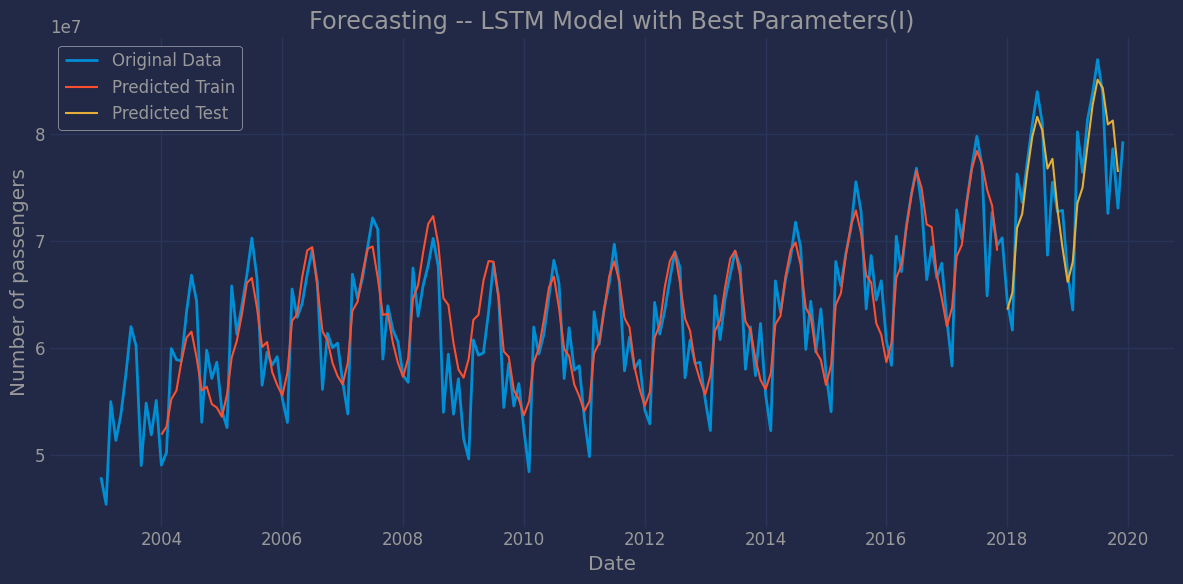

In [25]:
original_pax = df1["Pax"].values.reshape(-1, 1)
plt.figure(figsize=(12, 6))
plt.plot(df1["Date"], original_pax, label="Original Data", linewidth=2)
plt.plot(df1["Date"], train_plot1, label="Predicted Train")
plt.plot(df1["Date"], test_plot1, label="Predicted Test")
plt.title("Forecasting -- LSTM Model with Best Parameters(I)")
plt.xlabel("Date")
plt.ylabel("Number of passengers")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<a id='3'></a>
## 3. MODEL WITH BEST PARAMETERS (II)

Now, let's try to get a better model, so we fit another model by changing paremeters.

In [26]:
'''param_grid = {
    "units": [64, 100],                      
    "optimizer": ["adam", "nadam"],           
    "epochs": [120, 150],                     
    "batch_size": [8, 16, 32],              
    "input_size": [12, 24]               
}


best_model = None
best_mse = float("inf")
best_params = None

for units in param_grid["units"]:
    for opt in param_grid["optimizer"]:
        for epochs in param_grid["epochs"]:
            for batch in param_grid["batch_size"]:
                for input_size in param_grid["input_size"]:
                    print(f"Probando: units={units}, optimizer={opt}, epochs={epochs}, batch_size={batch}, input_size={input_size}")

                    if input_size == 12:
                        test = test
                    elif input_size == 24:
                        test = df1.loc[df1["Date"] >= "2016-01-01"]

                    # Create data sets with fixed time_step
                    X_train, y_train = create_dataset(train, input_size)
                    X_test, y_test = create_dataset(test, input_size)

                    # Reshape data for LSTM model
                    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
                    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

                    # Make new model
                    model = Sequential()
                    model.add(LSTM(units, return_sequences=True, input_shape=(X_train.shape[1], 1)))
                    model.add(LSTM(units, return_sequences=False))
                    model.add(Dense(1))

                    model.compile(optimizer=opt, loss="mean_squared_error")

                    # Training
                    model.fit(X_train, y_train, epochs=epochs, batch_size=batch, verbose=0)

                    # Forecasting and evaluation
                    test_pred = model.predict(X_test)
                    test_pred_inv = scaler.inverse_transform(test_pred)
                    y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

                    mse = mean_squared_error(y_test_inv, test_pred_inv)

                    print(f"--> MSE: {mse:.4f}")

                    if mse < best_mse:
                        best_mse = mse
                        best_model = model
                        best_params = {
                            "units": units,
                            "optimizer": opt,
                            "epochs": epochs,
                            "batch_size": batch,
                            "input_size": input_size
                        }

print("\n✅ Best parameters:")
print(f"Params: {best_params}")'''

'param_grid = {\n    "units": [64, 100],                      \n    "optimizer": ["adam", "nadam"],           \n    "epochs": [120, 150],                     \n    "batch_size": [8, 16, 32],              \n    "input_size": [12, 24]               \n}\n\n\nbest_model = None\nbest_mse = float("inf")\nbest_params = None\n\nfor units in param_grid["units"]:\n    for opt in param_grid["optimizer"]:\n        for epochs in param_grid["epochs"]:\n            for batch in param_grid["batch_size"]:\n                for input_size in param_grid["input_size"]:\n                    print(f"Probando: units={units}, optimizer={opt}, epochs={epochs}, batch_size={batch}, input_size={input_size}")\n\n                    if input_size == 12:\n                        test = test\n                    elif input_size == 24:\n                        test = df1.loc[df1["Date"] >= "2016-01-01"]\n\n                    # Create data sets with fixed time_step\n                    X_train, y_train = create_dataset

In [27]:
# Best parameters:
units2 = 64 
optimizer2 = 'adam' 
epochs2 = 120 
batch_size2 = 8
input_size2= 12

In [28]:
X_train2, y_train2 = create_dataset(train, input_size2)
X_test2, y_test2 = create_dataset(test, input_size2)

X_train2 = X_train2.reshape(X_train2.shape[0], X_train2.shape[1], 1)
X_test2 = X_test2.reshape(X_test2.shape[0], X_test2.shape[1], 1)

Train and fit the model with best parameters.

In [29]:
# Fix seed for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

model2 = Sequential()
model2.add(LSTM(units2, return_sequences=True, input_shape=(X_train2.shape[1], 1)))  #50 celdas en cada capa
model2.add(LSTM(units2, return_sequences=False))
model2.add(Dense(1))

model2.compile(optimizer=optimizer2, loss="mean_squared_error")

In [30]:
model2.fit(X_train2, y_train2, epochs=epochs2, batch_size=batch_size2, verbose=1)

Epoch 1/120
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.1089
Epoch 2/120
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0280
Epoch 3/120
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0261
Epoch 4/120
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0265
Epoch 5/120
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0267
Epoch 6/120
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0265
Epoch 7/120
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0260
Epoch 8/120
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0252
Epoch 9/120
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0240
Epoch 10/120
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0220
Epoch 11/120
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0186
Epoch 12/120
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0145
Epoch 13/120
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0188
Epoch 14/120
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0121
Epoch 15/120
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - lo

In [31]:
train_predict2 = model2.predict(X_train2)
test_predict2 = model2.predict(X_test2)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


In [32]:
train_predict2 = scaler.inverse_transform(train_predict2)
test_predict2 = scaler.inverse_transform(test_predict2)
y_train_inv2 = scaler.inverse_transform(y_train2.reshape(-1, 1))
y_test_inv2 = scaler.inverse_transform(y_test2.reshape(-1, 1))

Error metrics

In [33]:
print("\n🔹 Training set metrics:")
print(f"MAE: {mean_absolute_error(y_train_inv2, train_predict2):.2f}")
print(f"MAPE: {mean_absolute_percentage_error(y_train_inv2, train_predict2) * 100:.2f}%")

print("\n🔹 Test set metrics:")
print(f"MAE: {mean_absolute_error(y_test_inv2, test_predict2):.2f}")
print(f"MAPE: {mean_absolute_percentage_error(y_test_inv2, test_predict2) * 100:.2f}%")


🔹 Training set metrics:
MAE: 1667388.75
MAPE: 2.72%

🔹 Test set metrics:
MAE: 2509245.50
MAPE: 3.34%


In [34]:
train_plot2 = np.empty_like(scaled_data)
train_plot2[:, :] = np.nan
train_plot2[input_size2 : len(train_predict2) + input_size2, :] = train_predict2

test_plot2 = np.empty_like(scaled_data)
test_plot2[:, :] = np.nan
test_plot2[len(train_predict2) - 12 + (input_size2* 2) + 1 : len(df1) - 1, :] = test_predict2

Plot of the forecasting

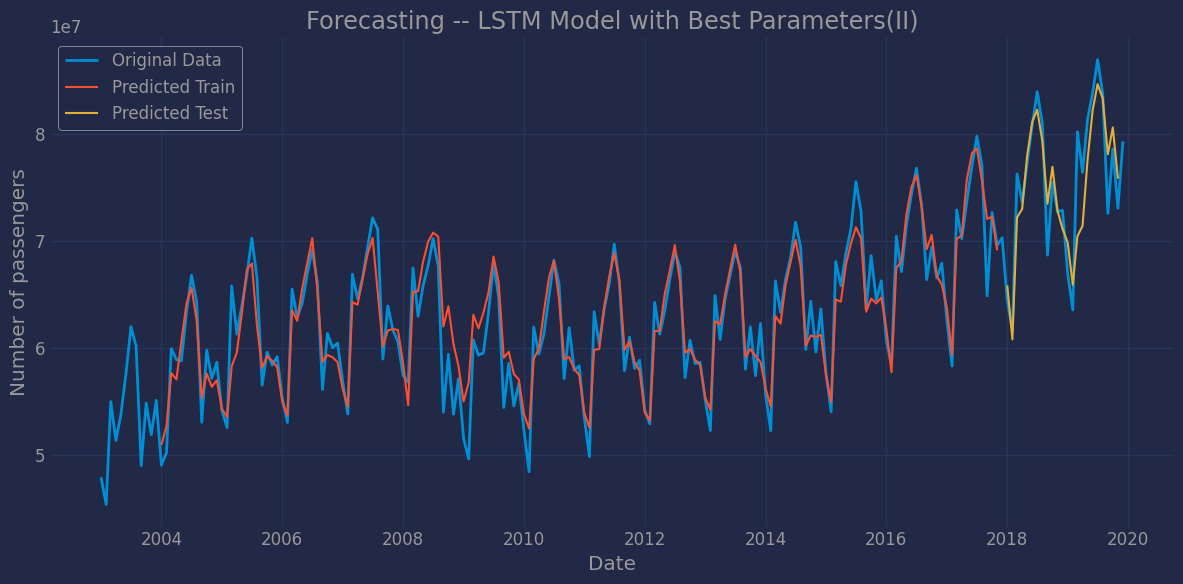

In [35]:
original_pax = df1["Pax"].values.reshape(-1, 1)
plt.figure(figsize=(12, 6))
plt.plot(df1["Date"], original_pax, label="Original Data", linewidth=2)
plt.plot(df1["Date"], train_plot2, label="Predicted Train")
plt.plot(df1["Date"], test_plot2, label="Predicted Test")
plt.title("Forecasting -- LSTM Model with Best Parameters(II)")
plt.xlabel("Date")
plt.ylabel("Number of passengers")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("../graphics/LSTM_sin_covid/fore_best_lstm_sin_covid", dpi=300, bbox_inches="tight")
plt.show()

<a id='4'></a>
## 4. MODEL WITH BEST PARAMETERS (III)

In [36]:
'''param_grid = {
    "units": [30, 50, 64, 100],
    "optimizer": ["adam", "rmsprop", "nadam"],
    "epochs": [50, 75, 100, 120, 150],
    "batch_size": [8, 16, 32, 64],
    "input_size": [12, 24]
}

best_model = None
best_mse = float("inf")
best_params = None

for units in param_grid["units"]:
    for opt in param_grid["optimizer"]:
        for epochs in param_grid["epochs"]:
            for batch in param_grid["batch_size"]:
                for input_size in param_grid["input_size"]:
                    print(f"Probando: units={units}, optimizer={opt}, epochs={epochs}, batch_size={batch}, input_size={input_size}")

                    if input_size == 12:
                        test = test
                    elif input_size == 24:
                        test = df1.loc[df1["Date"] >= "2016-01-01"]

                    # Create data sets with fixed time_step
                    X_train, y_train = create_dataset(train, input_size)
                    X_test, y_test = create_dataset(test, input_size)

                    # Reshape data for LSTM model
                    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
                    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

                    # Make new model
                    model = Sequential()
                    model.add(LSTM(units, return_sequences=True, input_shape=(X_train.shape[1], 1)))
                    model.add(LSTM(units, return_sequences=False))
                    model.add(Dense(1))

                    model.compile(optimizer=opt, loss="mean_squared_error")

                    # Training
                    model.fit(X_train, y_train, epochs=epochs, batch_size=batch, verbose=0)

                    # Forecasting and evaluation
                    test_pred = model.predict(X_test)
                    test_pred_inv = scaler.inverse_transform(test_pred)
                    y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

                    mse = mean_squared_error(y_test_inv, test_pred_inv)

                    print(f"--> MSE: {mse:.4f}")

                    if mse < best_mse:
                        best_mse = mse
                        best_model = model
                        best_params = {
                            "units": units,
                            "optimizer": opt,
                            "epochs": epochs,
                            "batch_size": batch,
                            "input_size": input_size
                        }

print("\n✅ Best parameters:")
print(f"Params: {best_params}")'''


'param_grid = {\n    "units": [30, 50, 64, 100],\n    "optimizer": ["adam", "rmsprop", "nadam"],\n    "epochs": [50, 75, 100, 120, 150],\n    "batch_size": [8, 16, 32, 64],\n    "input_size": [12, 24]\n}\n\nbest_model = None\nbest_mse = float("inf")\nbest_params = None\n\nfor units in param_grid["units"]:\n    for opt in param_grid["optimizer"]:\n        for epochs in param_grid["epochs"]:\n            for batch in param_grid["batch_size"]:\n                for input_size in param_grid["input_size"]:\n                    print(f"Probando: units={units}, optimizer={opt}, epochs={epochs}, batch_size={batch}, input_size={input_size}")\n\n                    if input_size == 12:\n                        test = test\n                    elif input_size == 24:\n                        test = df1.loc[df1["Date"] >= "2016-01-01"]\n\n                    # Create data sets with fixed time_step\n                    X_train, y_train = create_dataset(train, input_size)\n                    X_test, 

In [37]:
# Best parameters:
units3 = 30
optimizer3 = 'nadam' 
epochs3 = 50 
batch_size3 = 32
input_size3= 12

In [38]:
X_train3, y_train3 = create_dataset(train, input_size3)
X_test3, y_test3 = create_dataset(test, input_size3)

X_train3 = X_train3.reshape(X_train3.shape[0], X_train3.shape[1], 1)
X_test3 = X_test3.reshape(X_test3.shape[0], X_test3.shape[1], 1)

Train and fit the model with best parameters.

In [39]:
# Fix seed for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

model3 = Sequential()
model3.add(LSTM(units3, return_sequences=True, input_shape=(X_train3.shape[1], 1))) 
model3.add(LSTM(units3, return_sequences=False))
model3.add(Dense(1))

model3.compile(optimizer=optimizer3, loss="mean_squared_error")

In [40]:
model3.fit(X_train3, y_train3, epochs=epochs3, batch_size=batch_size3, verbose=1)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.1959
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0810
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0277
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0296
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0268
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0265
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0264
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0264
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0263
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0262
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0261
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0259
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0258
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0257
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0256
Epoch 16/50
6/6 ━━━━━━━━━━━━━━━━━━

In [41]:
train_predict3 = model3.predict(X_train3)
test_predict3 = model3.predict(X_test3)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


In [42]:
train_predict3 = scaler.inverse_transform(train_predict3)
test_predict3 = scaler.inverse_transform(test_predict3)
y_train_inv3 = scaler.inverse_transform(y_train3.reshape(-1, 1))
y_test_inv3 = scaler.inverse_transform(y_test3.reshape(-1, 1))

Error metrics

In [43]:
print("\n🔹 Training set metrics:")
print(f"MAE: {mean_absolute_error(y_train_inv3, train_predict3):.2f}")
print(f"MAPE: {mean_absolute_percentage_error(y_train_inv3, train_predict3) * 100:.2f}%")

print("\n🔹 Test set metrics:")
print(f"MAE: {mean_absolute_error(y_test_inv3, test_predict3):.2f}")
print(f"MAPE: {mean_absolute_percentage_error(y_test_inv3, test_predict3) * 100:.2f}%")


🔹 Training set metrics:
MAE: 2543849.50
MAPE: 4.17%

🔹 Test set metrics:
MAE: 3963495.25
MAPE: 5.20%


In [44]:
train_plot3 = np.empty_like(scaled_data)
train_plot3[:, :] = np.nan
train_plot3[input_size3 : len(train_predict3) + input_size3, :] = train_predict3

test_plot3 = np.empty_like(scaled_data)
test_plot3[:, :] = np.nan
test_plot3[len(train_predict3) - 12 + (input_size3* 2) + 1 : len(df1) - 1, :] = test_predict3

Plot of the forecasting

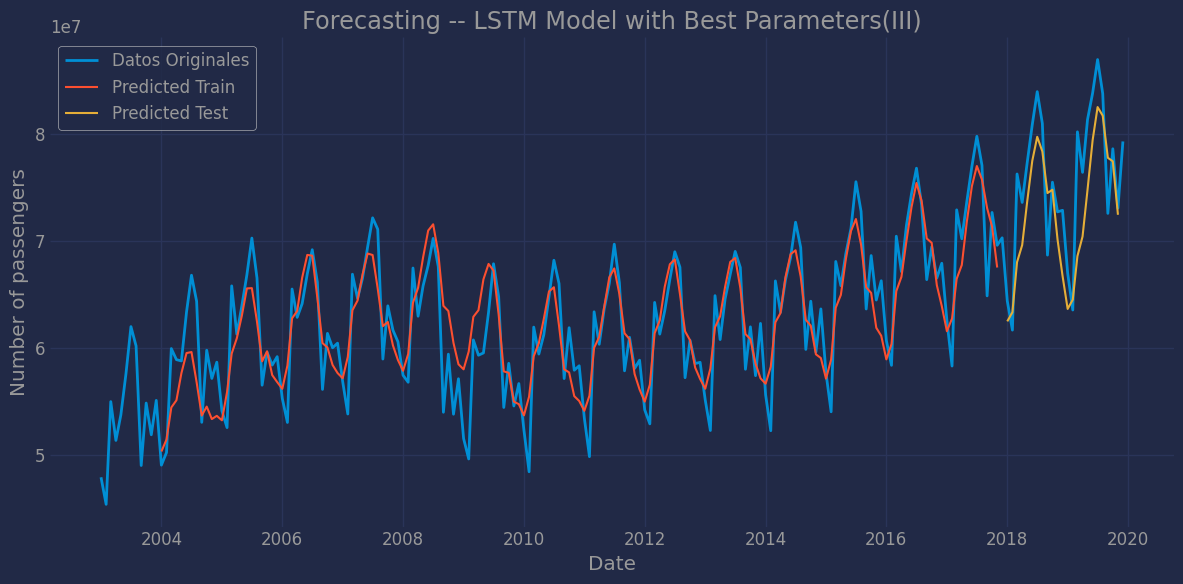

In [45]:
original_pax = df1["Pax"].values.reshape(-1, 1)
plt.figure(figsize=(12, 6))
plt.plot(df1["Date"], original_pax, label="Datos Originales", linewidth=2)
plt.plot(df1["Date"], train_plot3, label="Predicted Train")
plt.plot(df1["Date"], test_plot3, label="Predicted Test")
plt.title("Forecasting -- LSTM Model with Best Parameters(III)")
plt.xlabel("Date")
plt.ylabel("Number of passengers")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()